In [314]:
import numpy as np
import matplotlib.pyplot as plt

Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.

In [315]:
kk = 3
bb = 8

num_points = 100
noise = np.random.normal(0, 2, num_points)  
xx = np.random.uniform(0, 10, num_points)  
yy = kk * xx + bb + noise  

print("Перші 5 точок:")
for i in range(5):
    print(f"Точка {i+1}: (x={xx[i]}, y={yy[i]})")


Перші 5 точок:
Точка 1: (x=6.542874032207423, y=24.409380942583084)
Точка 2: (x=1.7598743733639965, y=14.773895822146606)
Точка 3: (x=1.1456766209835056, y=13.226848081728038)
Точка 4: (x=0.6248637160438364, y=6.784786505546991)
Точка 5: (x=5.854965611514191, y=23.15329996831334)


Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок ^k та ^b.

In [316]:
def least_squares_estimate(xx, yy):
    n = len(xx)
    
    sum_xx = np.sum(xx)
    sum_yy = np.sum(yy)
    sum_xy = np.sum(xx * yy)
    sum_xx_squared = np.sum(xx**2)
    
    k_hat = (n * sum_xy - sum_xx * sum_yy) / (n * sum_xx_squared - sum_xx**2)
    b_hat = (sum_yy - k_hat * sum_xx) / n
    
    return k_hat, b_hat

k_hat, b_hat = least_squares_estimate(xx, yy)
print("Оригінальні параметри прямої:")
print(f"k = {kk}")
print(f"b = {bb}\n")
print("Оптимальні оцінки ^k та ^b:")
print(f"^k = {k_hat}")
print(f"^b = {b_hat}")


Оригінальні параметри прямої:
k = 3
b = 8

Оптимальні оцінки ^k та ^b:
^k = 2.990605217689404
^b = 7.680571053420624


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [317]:

polyfit_k, polyfit_b = np.polyfit(xx, yy, 1)


print("Порівняння знайдених параметрів:")
print(f"Оптимальна оцінка ^k: {k_hat}, Оцінка за np.polyfit: {polyfit_k}")
print(f"Оптимальна оцінка ^b: {b_hat}, Оцінка за np.polyfit: {polyfit_b}")

if kk is not None and bb is not None:
    print("\nПорівняння з початковими параметрами прямої:")
    print(f"Початкове k: {kk}, Оцінка за np.polyfit: {polyfit_k}")
    print(f"Початкове b: {bb}, Оцінка за np.polyfit: {polyfit_b}")


Порівняння знайдених параметрів:
Оптимальна оцінка ^k: 2.990605217689404, Оцінка за np.polyfit: 2.9906052176894025
Оптимальна оцінка ^b: 7.680571053420624, Оцінка за np.polyfit: 7.68057105342064

Порівняння з початковими параметрами прямої:
Початкове k: 3, Оцінка за np.polyfit: 2.9906052176894025
Початкове b: 8, Оцінка за np.polyfit: 7.68057105342064


Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

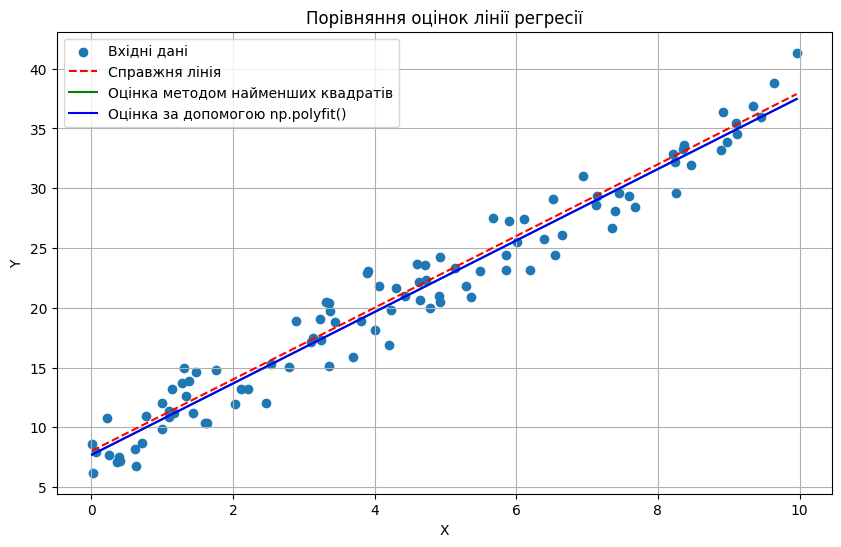

In [318]:

line_x = np.linspace(min(xx), max(xx), 100)
line_y_true = kk * line_x + bb
line_y_estimated = k_hat * line_x + b_hat
line_y_polyfit = polyfit_k * line_x + polyfit_b

plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Вхідні дані')
plt.plot(line_x, line_y_true, color='red', linestyle='--', label='Справжня лінія')
plt.plot(line_x, line_y_estimated, color='green', label='Оцінка методом найменших квадратів')
plt.plot(line_x, line_y_polyfit, color='blue', label='Оцінка за допомогою np.polyfit()')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Порівняння оцінок лінії регресії')
plt.legend()
plt.grid(True)
plt.show()


Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок ^k та ^b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [319]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent(xx, yy, learning_rate=0.01, n_iter=1000, tol=1e-6):
    k = 0
    b = 0
    n = len(xx)
    
    for _ in range(n_iter):
        y_pred = k * xx + b
        
        loss = mean_squared_error(yy, y_pred)
        
        if loss < tol:
            break
        
        grad_k = -(2/n) * np.sum(xx * (yy - y_pred))
        grad_b = -(2/n) * np.sum(yy - y_pred)
        
        k -= learning_rate * grad_k
        b -= learning_rate * grad_b
        
    return k, b

learning_rate = 0.01
n_iter = 1000
optimal_k, optimal_b = gradient_descent(xx, yy, learning_rate, n_iter)
print("Оптимальні оцінки ^k та ^b, отримані за допомогою градієнтного спуску:")
print(f"^k = {optimal_k}")
print(f"^b = {optimal_b}")


Оптимальні оцінки ^k та ^b, отримані за допомогою градієнтного спуску:
^k = 2.994149077086765
^b = 7.6589109167742055


Додайте отриману лінію регресії на загальний графік

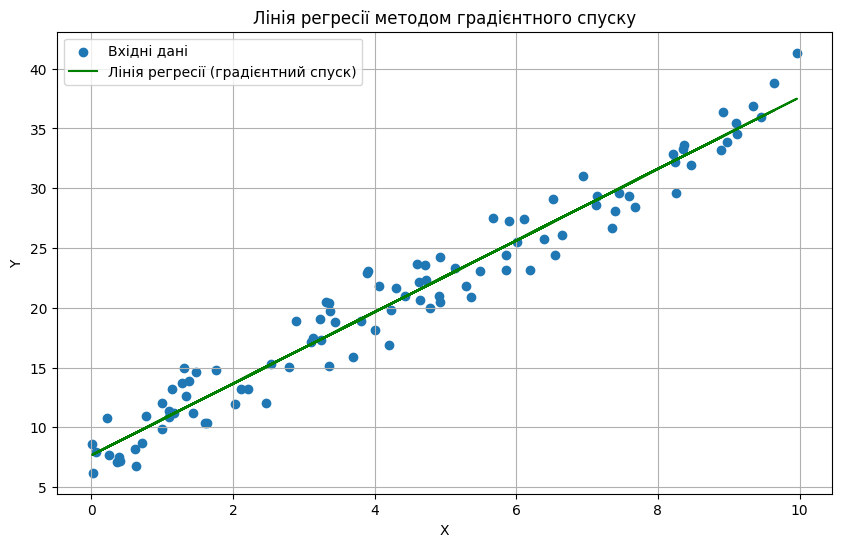

In [320]:

learning_rate = 0.01
n_iter = 1000


optimal_k, optimal_b = gradient_descent(xx, yy, learning_rate, n_iter)


plt.figure(figsize=(10, 6))
plt.scatter(xx, yy, label='Вхідні дані')


plt.plot(xx, optimal_k * xx + optimal_b, color='green', label='Лінія регресії (градієнтний спуск)')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лінія регресії методом градієнтного спуску')
plt.legend()
plt.grid(True)
plt.show()


Побудуйте графік похибки від кількості ітерацій, зробіть висновки

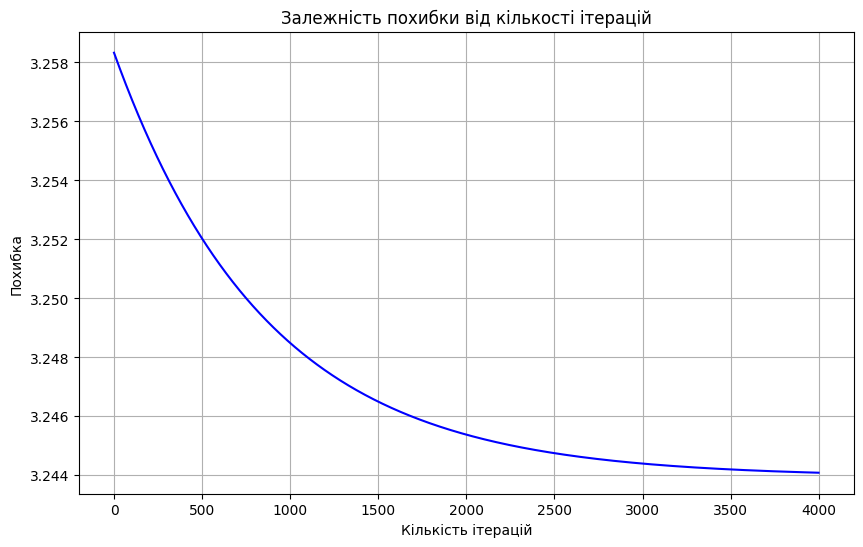

In [321]:
def gradient_descent_with_error(xx, yy, learning_rate=0.01, n_iter=1000, tol=1e-6):
    k = 0
    b = 0
    n = len(xx)
    
    errors = []
    

    for _ in range(n_iter):

        y_pred = k * xx + b
        
        loss = mean_squared_error(yy, y_pred)
        errors.append(loss)
        
        if loss < tol:
            break
        
        grad_k = -(2/n) * np.sum(xx * (yy - y_pred))
        grad_b = -(2/n) * np.sum(yy - y_pred)
        
        k -= learning_rate * grad_k
        b -= learning_rate * grad_b
        
    return errors

learning_rate = 0.001
n_iter = 10000
errors = gradient_descent_with_error(xx, yy, learning_rate, n_iter)

plt.figure(figsize=(10, 6))
plt.plot(range(len(errors[6000:])), errors[6000:], color='blue')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()


Порівняйте отримані результати з результатами попереднього завдання

In [322]:

estimated_k = optimal_k
estimated_b = optimal_b

estimated_k_polyfit = np.polyfit(xx, yy, 1)[0]
estimated_b_polyfit = np.polyfit(xx, yy, 1)[1]


print("Оптимальний нахил (градієнтний спуск):", optimal_k)
print("Оптимальне зміщення (градієнтний спуск):", optimal_b)
print("Оцінка нахилу (метод найменших квадратів):", estimated_k)
print("Оцінка зміщення (метод найменших квадратів):", estimated_b)
print("Оцінка нахилу (np.polyfit()):", estimated_k_polyfit)
print("Оцінка зміщення (np.polyfit()):", estimated_b_polyfit)


Оптимальний нахил (градієнтний спуск): 2.994149077086765
Оптимальне зміщення (градієнтний спуск): 7.6589109167742055
Оцінка нахилу (метод найменших квадратів): 2.994149077086765
Оцінка зміщення (метод найменших квадратів): 7.6589109167742055
Оцінка нахилу (np.polyfit()): 2.9906052176894025
Оцінка зміщення (np.polyfit()): 7.68057105342064
